# Task 3: Customer Segmentation / Clustering

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")



In [3]:
# Preprocessing
# Merge customer profile with transaction data
transaction_count = transactions.groupby('CustomerID').size().reset_index(name='TransactionCount')
merged = pd.merge(customers, transaction_count, on='CustomerID')

In [4]:
# Encode 'Region' column
encoder = OneHotEncoder()
region_encoded = encoder.fit_transform(merged[['Region']]).toarray()
region_encoded_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['Region']))

# Combine numeric and encoded features
merged['SignupDate'] = pd.to_datetime(merged['SignupDate'])
merged['DaysSinceSignup'] = (merged['SignupDate'] - merged['SignupDate'].min()).dt.days
final_features = pd.concat([merged[['TransactionCount', 'DaysSinceSignup']].reset_index(drop=True), region_encoded_df], axis=1)

# Standardize features
scaler = StandardScaler()
final_features_scaled = scaler.fit_transform(final_features)


C:\Users\gokul\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


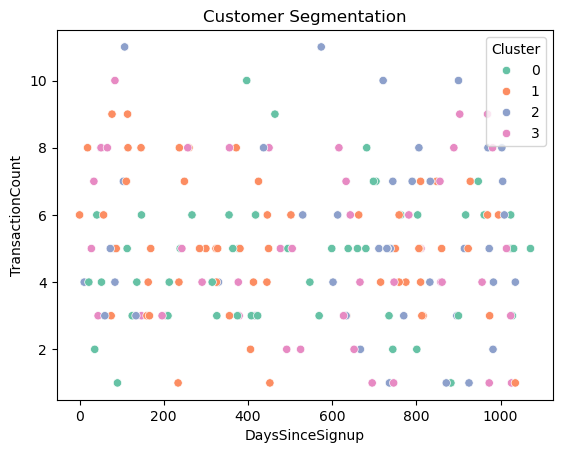

In [5]:
# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
final_features_scaled = pd.DataFrame(final_features_scaled, columns=final_features.columns)
kmeans.fit(final_features_scaled)

# Add cluster labels to the data
merged['Cluster'] = kmeans.labels_

# Cluster visualization
sns.scatterplot(data=merged, x='DaysSinceSignup', y='TransactionCount', hue='Cluster', palette='Set2')
plt.title("Customer Segmentation")
plt.show()

In [6]:
# Compute DB Index
db_index = davies_bouldin_score(final_features_scaled, kmeans.labels_)
print(f"DB Index: {db_index}")

DB Index: 0.7972385456164645
